In [20]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install xgboost
%pip install -q hpbandster ConfigSpace


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may ne

# Loading Data

In [1]:
# processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# models
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# hyperparameter tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH
import hpbandster.core.nameserver as hpns
from hpbandster.core.worker import Worker
from hpbandster.optimizers import BOHB


/home/mohamed/cis/AI2/.venv/lib/python3.13/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
data = pd.read_csv('Concrete_Compressive_Strength.csv')

In [3]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
data.describe()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# visualizing Relationships

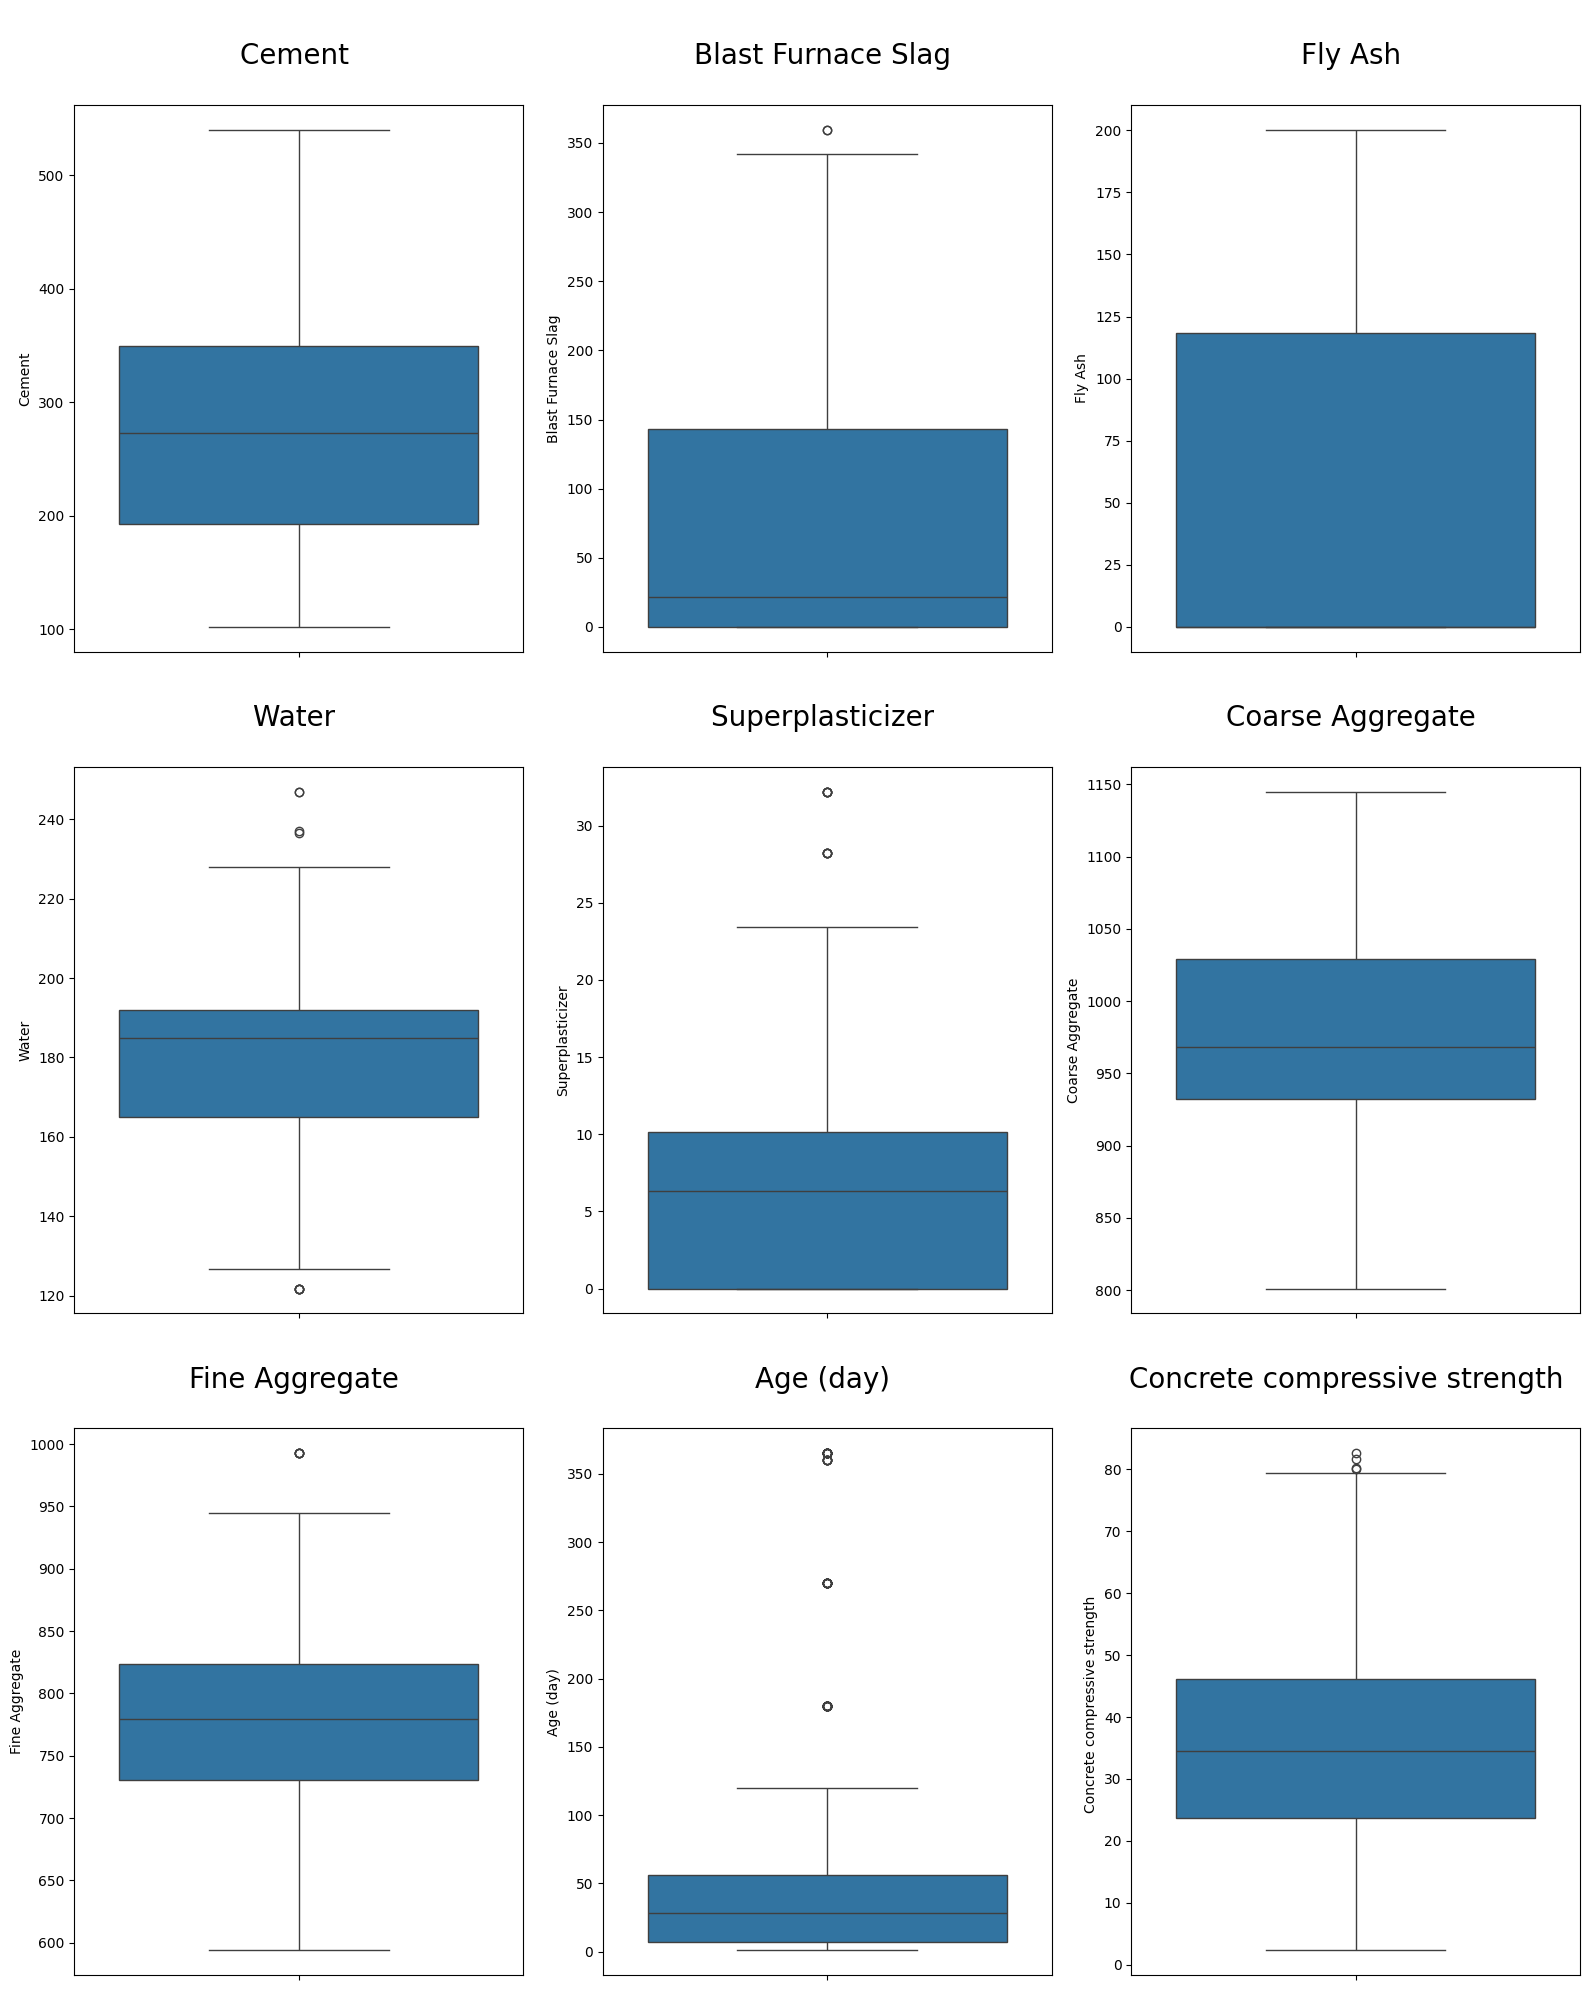

In [6]:
cols = data.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(0, len(cols)):
    ax = plt.subplot(3, 3, i+1)
    sns.boxplot(y = cols[i], data = data, ax = ax)
    plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
plt.tight_layout()
plt.show()


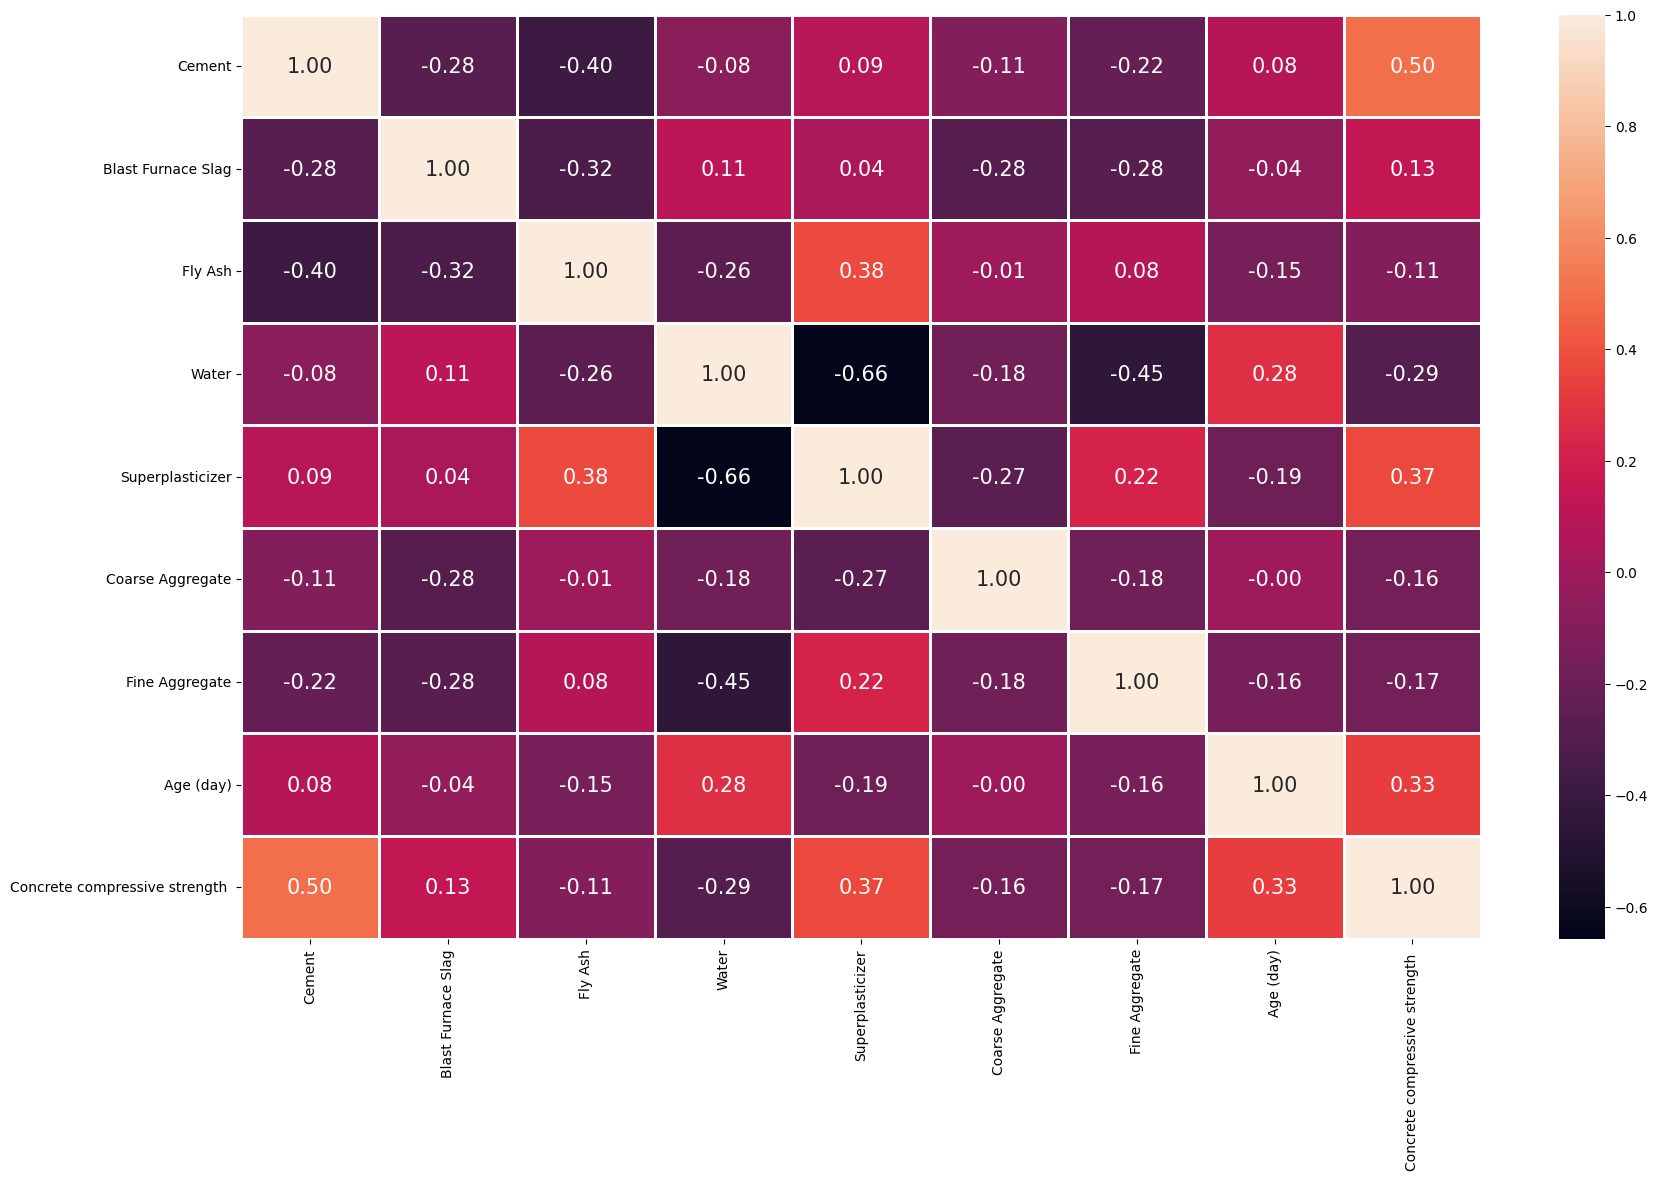

In [7]:
plt.figure(figsize = (20, 12))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.show()


In [8]:
data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [9]:

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
X.var()

Cement                10921.742654
Blast Furnace Slag     7444.083725
Fly Ash                4095.548093
Water                   456.060245
Superplasticizer         35.682602
Coarse Aggregate       6045.656228
Fine Aggregate         6428.099159
Age (day)              3990.437729
dtype: float64

In [11]:
# Normalizing Features
for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])


In [12]:
X.var()

Cement                0.143939
Blast Furnace Slag    5.816392
Fly Ash               5.641045
Water                 0.014066
Superplasticizer      1.333888
Coarse Aggregate      0.006475
Fine Aggregate        0.011292
Age (day)             1.233057
dtype: float64

# Splitting Data into train/test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

# Modelling

## 1. SVM

In [15]:

svmodel = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svmodel.fit(X_train, y_train)

print("Training Score :", svmodel.score(X_train, y_train))
print("Testing Score  :", svmodel.score(X_test, y_test))

Training Score : 0.9526972032943913
Testing Score  : 0.880722794594593


## 2. Decision Tree

In [42]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train, y_train)

print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

0.9690415343287434
0.776219335805495


## 3. Random Forest Regression

In [18]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print("Training Score :", rfr.score(X_train, y_train))
print("Testing Score  :", rfr.score(X_test, y_test))

Training Score : 0.9883039300967317
Testing Score  : 0.8868137640737017


## 4. AdaBoost

In [19]:
ada = AdaBoostRegressor(estimator=dtr)
ada.fit(X_train, y_train)

print("Training Score :", ada.score(X_train, y_train))
print("Testing Score  :", ada.score(X_test, y_test))

Training Score : 0.995371146287541
Testing Score  : 0.8910062948527308


## 5. XGBoost Regression

In [20]:
xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

print("Training Score :", xgb.score(X_train, y_train))
print("Testing Score  :", xgb.score(X_test, y_test))

Training Score : 0.9993894243981739
Testing Score  : 0.9048420005080882


# Hyperparameter Optimization

## 1. Bayesian Optimization for SVM

In [32]:
space = {
    'C': hp.loguniform('C', np.log(1e-3), np.log(1e3)),
    'gamma': hp.loguniform('gamma', np.log(1e-4), np.log(1)),
    'epsilon': hp.uniform('epsilon', 0.01, 1.0),
    'kernel': 'rbf' 
}

def objective(space):
    
    svr = SVR(
        C=space['C'],
        gamma=space['gamma'],
        epsilon=space['epsilon'],
        kernel='rbf'
    )
    
    svr.fit(X_train, y_train)
    preds = svr.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)

    return {'loss': mse, 'status': STATUS_OK}

trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

100%|██████████| 100/100 [00:05<00:00, 17.34trial/s, best loss: 30.361872812816642]


In [33]:
print("Best Hyperparameters:", best)


Best Hyperparameters: {'C': np.float64(259.37382638913846), 'epsilon': np.float64(0.6346534039350112), 'gamma': np.float64(0.15027995121354523)}


In [34]:
svr_obt = SVR(
    C=best['C'],
    gamma=best['gamma'],
    epsilon=best['epsilon'],
    kernel='rbf'
)

svr_obt.fit(X_train, y_train)

print("Training Score :", svr_obt.score(X_train, y_train))
print("Testing  Score :", svr_obt.score(X_test, y_test))


Training Score : 0.9768513143858405
Testing  Score : 0.8946136492980987


## 2. Bayesian Optimization for XGBoost

In [35]:
space = {
    'max_depth': hp.quniform('max_depth', 4, 8, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),  # 0.0067 – 0.36
    'gamma': hp.uniform('gamma', 0, 3),
    'min_child_weight': hp.quniform('min_child_weight', 1, 5, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 5),
    'reg_lambda': hp.uniform('reg_lambda', 0.5, 5),
    'n_estimators': hp.quniform('n_estimators', 150, 300, 1),
}

def objective(space):
    clf = XGBRegressor(
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        gamma = space['gamma'],
        min_child_weight = int(space['min_child_weight']),
        subsample = space['subsample'],
        colsample_bytree = space['colsample_bytree'],
        reg_alpha = space['reg_alpha'],
        reg_lambda = space['reg_lambda'],
        n_estimators = int(space['n_estimators']),
        seed = 0,
        device='cuda'
    )
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation)
    
    preds = clf.predict(X_test)
    accuracy = mean_squared_error(y_test, preds)    
    print ("SCORE:", accuracy)
    return {'loss': accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[0]	validation_0-rmse:16.52372	validation_1-rmse:16.91992
[1]	validation_0-rmse:16.45635	validation_1-rmse:16.87183
[2]	validation_0-rmse:16.38096	validation_1-rmse:16.81247
[3]	validation_0-rmse:16.31209	validation_1-rmse:16.76533
[4]	validation_0-rmse:16.24492	validation_1-rmse:16.71608
[5]	validation_0-rmse:16.17122	validation_1-rmse:16.66138
[6]	validation_0-rmse:16.11185	validation_1-rmse:16.62296
[7]	validation_0-rmse:16.03804	validation_1-rmse:16.56379
[8]	validation_0-rmse:15.95676	validation_1-rmse:16.49273
[9]	validation_0-rmse:15.85169	validation_1-rmse:16.39748
[10]	validation_0-rmse:15.75436	validation_1-rmse:16.30942
[11]	validation_0-rmse:15.66804	validation_1-rmse:16.23410
[12]	validation_0-rmse:15.60547	validation_1-rmse:16.18856
[13]	validation_0-rmse:15.53560	validation_1-rmse:16.13361
[14]	validation_0-rmse:15.43119	validation_1-rmse:16.04447
[15]	validation_0-rmse:15.38154	validation_1-rmse:16.01120
[16]	validation_0-rmse:15.31714	validation_1-rmse:15.96574
[17]	va

/home/mohamed/cis/AI2/.venv/lib/python3.13/site-packages/xgboost/core.py:774: UserWarning: [06:02:09] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)



[15]	validation_0-rmse:2.62424	validation_1-rmse:5.63171                        
[16]	validation_0-rmse:2.54665	validation_1-rmse:5.58752                        
[17]	validation_0-rmse:2.45971	validation_1-rmse:5.51775                        
[18]	validation_0-rmse:2.38980	validation_1-rmse:5.47914                        
[19]	validation_0-rmse:2.33869	validation_1-rmse:5.44775                        
[20]	validation_0-rmse:2.29288	validation_1-rmse:5.41512                        
[21]	validation_0-rmse:2.21606	validation_1-rmse:5.36739                        
[22]	validation_0-rmse:2.15089	validation_1-rmse:5.35210                        
[23]	validation_0-rmse:2.11496	validation_1-rmse:5.31575                        
[24]	validation_0-rmse:2.06973	validation_1-rmse:5.26613                        
[25]	validation_0-rmse:1.97865	validation_1-rmse:5.23977                        
[26]	validation_0-rmse:1.95722	validation_1-rmse:5.21706                        
[27]	validation_0-rmse:1.913

In [36]:
best_hyperparams

{'colsample_bytree': np.float64(0.85045196133369),
 'gamma': np.float64(1.6494456833866695),
 'learning_rate': np.float64(0.17032166164854054),
 'max_depth': np.float64(7.0),
 'min_child_weight': np.float64(3.0),
 'n_estimators': np.float64(299.0),
 'reg_alpha': np.float64(2.2313228984621785),
 'reg_lambda': np.float64(3.938657146095279),
 'subsample': np.float64(0.6731490247039987)}

In [37]:
xgb_obt = XGBRegressor(
    colsample_bytree=best_hyperparams['colsample_bytree'],
    gamma=best_hyperparams['gamma'],
    learning_rate=best_hyperparams['learning_rate'],
    max_depth= int(best_hyperparams['max_depth']),
    min_child_weight=int(best_hyperparams['min_child_weight']),
    n_estimators= int(best_hyperparams['n_estimators']),
    reg_alpha=best_hyperparams['reg_alpha'],
    reg_lambda=best_hyperparams['reg_lambda'],
    subsample=best_hyperparams['subsample']

)
xgb_obt.fit(X_train, y_train)

print("Training Score :", xgb_obt.score(X_train, y_train))
print("Testing Score  :", xgb_obt.score(X_test, y_test))

Training Score : 0.9951999165093065
Testing Score  : 0.9032440035218076


## 3. BOHB Optimization for XGBoost

In [ ]:
def get_configspace():
    cs = CS.ConfigurationSpace()

    cs.add_hyperparameters([
        CSH.UniformFloatHyperparameter("learning_rate", lower=0.01, upper=0.3, log=True),
        CSH.UniformIntegerHyperparameter("max_depth", lower=3, upper=15),
        CSH.UniformIntegerHyperparameter("n_estimators", lower=50, upper=300),
        CSH.UniformFloatHyperparameter("gamma", lower=0.0, upper=5.0),
    ])
    return cs

class XGBWorker(Worker):
    def __init__(self, X_train, X_test, y_train, y_test, **kwargs):
        super().__init__(**kwargs)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def compute(self, config, budget, **kwargs):
        # budget (Hyperband) usually equals n_estimators
        n_estimators = int(budget)

        model = XGBRegressor(
            learning_rate=config["learning_rate"],
            max_depth=int(config["max_depth"]),
            n_estimators=n_estimators,
            gamma=config["gamma"]
        )

        model.fit(self.X_train, self.y_train)
        score = model.score(self.X_test, self.y_test)

        return {"loss": 1 - score, "info": {"score": score}}

def run_bohb(X_train, X_test, y_train, y_test, max_budget=300, min_budget=30, n_iterations=20):

    NS = hpns.NameServer(run_id="xgb_bohb", host="localhost", port=None)
    NS.start()

    worker = XGBWorker(X_train=X_train, 
                       X_test=X_test,
                       y_train=y_train, 
                       y_test=y_test,
                       run_id="xgb_bohb")
    worker.run(background=True)

    cs = get_configspace()

    bohb = BOHB(
        configspace=cs,
        run_id="xgb_bohb",
        min_budget=min_budget,
        max_budget=max_budget
    )

    result = bohb.run(n_iterations=n_iterations)
    bohb.shutdown(shutdown_workers=True)
    NS.shutdown()

    return result


In [40]:
result = run_bohb(X_train, X_test, y_train, y_test)

id2config = result.get_id2config_mapping()
best_id = result.get_best_id()

print("Best Config:", id2config[best_id]["config"])
print("Best Score:", 1 - result.get_runs_by_id(best_id)[-1].loss)

20:31:35 wait_for_workers trying to get the condition
20:31:35 DISPATCHER: started the 'discover_worker' thread
20:31:35 DISPATCHER: started the 'job_runner' thread
20:31:35 DISPATCHER: Pyro daemon running on localhost:40809
20:31:35 DISPATCHER: Starting worker discovery
20:31:35 DISPATCHER: started the 'discover_worker' thread
20:31:35 DISPATCHER: started the 'job_runner' thread
20:31:35 DISPATCHER: Pyro daemon running on localhost:40809
20:31:35 DISPATCHER: Starting worker discovery
20:31:35 DISPATCHER: Found 0 potential workers, 0 currently in the pool.
20:31:35 DISPATCHER: Finished worker discovery
20:31:35 DISPATCHER: jobs to submit = 0, number of idle workers = 0 -> waiting!
20:31:35 HBMASTER: only 0 worker(s) available, waiting for at least 1.
20:31:35 DISPATCHER: Found 0 potential workers, 0 currently in the pool.
20:31:35 DISPATCHER: Finished worker discovery
20:31:35 DISPATCHER: jobs to submit = 0, number of idle workers = 0 -> waiting!
20:31:35 HBMASTER: only 0 worker(s) ava

KeyboardInterrupt: 

---

# Testing On Other Dataset

In [22]:
datatest = pd.read_csv('Concrete_Data.xls')
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [24]:
data.equals(datatest)

False

> ### The two datasets have the same shape and the same features, but they are not equals

In [25]:
# preprocessing test data

X2 = datatest.iloc[:,:-1]
y2 = datatest.iloc[:,-1]

for column in X2.columns:
    X2[column] += 1
    X2[column] = np.log(X2[column])

sc = StandardScaler()
X2 = sc.fit_transform(X2)

In [26]:
svmodel.score(X2, y2)

0.9335666455784456

In [27]:
rfr.score(X2, y2)

0.9482425970193009

In [28]:
xgb.score(X2, y2)

0.8048700985345372

In [38]:
xgb_obt.score(X2, y2)

0.8171303577480549

In [39]:
svr_obt.score(X2, y2)

0.9548725208359011

# test

In [57]:
dt = datatest.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement', 
'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag', 
'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash', 
'Water  (component 4)(kg in a m^3 mixture)': 'Water', 
'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate', 
'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate', 
'Age (day)': 'Age (day)',
'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength '

})

In [60]:
con = pd.concat([data, dt], axis=0)

In [62]:
con

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.280000
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.180000
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.700000
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.770000


In [63]:
X = con.iloc[:, :-1]
y = con.iloc[:, -1]

In [64]:
from sklearn.model_selection import train_test_split

X_main, X_test0, y_main, y_test0 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train0, X_val0, y_train0, y_val0 = train_test_split(X_main, y_main, test_size=0.2, random_state=42)

In [67]:
for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

sc = StandardScaler()
X_train0 = sc.fit_transform(X_train0)
X_val0 = sc.transform(X_val0)
X_test0 = sc.transform(X_test0)

In [68]:

svmodel = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svmodel.fit(X_train0, y_train0)

print("\nSVR Results:")
print("Training Score :", svmodel.score(X_train0, y_train0))
print("Testing Score  :", svmodel.score(X_val0, y_val0))
print("Testing 2 Score  :", svmodel.score(X_test0, y_test0))
print('Test other dataset Score  :', svmodel.score(X2, y2))
print()

dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train0, y_train0)

print("\nDecision Tree Regressor Results:")
print("Training Score :", dtr.score(X_train0, y_train0))
print("Testing Score  :", dtr.score(X_val0, y_val0))
print("Testing 2 Score  :", dtr.score(X_test0, y_test0))
print('Test other dataset Score  :', dtr.score(X2, y2))
print()

rfr = RandomForestRegressor()
rfr.fit(X_train0, y_train0)

print("\nRandom Forest Regressor Results:")
print("Training Score :", rfr.score(X_train0, y_train0))
print("Testing Score  :", rfr.score(X_val0, y_val0))
print("Testing 2 Score  :", rfr.score(X_test0, y_test0))
print('Test other dataset Score  :', rfr.score(X2, y2))
print()

ada = AdaBoostRegressor(estimator=dtr)
ada.fit(X_train0, y_train0)

print("\nAdaBoost Regressor Results:")
print("Training Score :", ada.score(X_train0, y_train0))
print("Testing Score  :", ada.score(X_val0, y_val0))
print("Testing 2 Score  :", ada.score(X_test0, y_test0))
print('Test other dataset Score  :', ada.score(X2, y2))
print()

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train0, y_train0)

print("\nXGB Regressor Results:")
print("Training Score :", xgb.score(X_train0, y_train0))
print("Testing Score  :", xgb.score(X_val0, y_val0))
print("Testing 2 Score  :", xgb.score(X_test0, y_test0))
print('Test other dataset Score  :', xgb.score(X2, y2))



SVR Results:
Training Score : 0.9369678799432802
Testing Score  : 0.9005039098047918
Testing 2 Score  : 0.8906488437871876
Test other dataset Score  : -0.49214343426592766


Decision Tree Regressor Results:
Training Score : 0.9171373605166737
Testing Score  : 0.8093109659343607
Testing 2 Score  : 0.8407416992091694
Test other dataset Score  : 0.37096319459218774


Random Forest Regressor Results:
Training Score : 0.9943180274939315
Testing Score  : 0.9561975572157209
Testing 2 Score  : 0.9566972560527359
Test other dataset Score  : 0.7182282617462644


AdaBoost Regressor Results:
Training Score : 0.9918057646100283
Testing Score  : 0.9509944143369443
Testing 2 Score  : 0.9519401887450036
Test other dataset Score  : 0.7271005702165307


XGB Regressor Results:
Training Score : 0.998614294680216
Testing Score  : 0.9617009395065496
Testing 2 Score  : 0.9689794301360171
Test other dataset Score  : 0.7548677600000611
